In [10]:
### Getting the Initial Co-ordinates for each tile.. 
### The initial Co-Ordinates with the name of the image along with the subscript i.e. (mx + '1.jpg')  where the number 1 can be 1, 2, 3,...12

def init_cord(gray):
    l = 1
    ax, bx = int(gray.shape[0]/3), int(gray.shape[1]/4)
    buffer_x = 250
    buffer_y = 250
    init_cord = []
    images = []

    for i in range(0, 3):
        for j in range(0, 4):
            if(i==0):
                if(j%3==0):
                    if(j==0):
                        img = gray[i*ax:((i + 1)* (ax) + buffer_x), (j * bx) : ((j+1)*(bx) + buffer_y)]
                        w, x, y, z = i*ax, ((i + 1)* (ax) + buffer_x), (j * bx), ((j+1)*(bx) + buffer_y) 
                        #print(i*ax, ((i + 1)* (ax) + buffer_x), (j * bx), ((j+1)*(bx) + buffer_y))
                        #print(w, x, y, z)
                    else:
                        img = gray[i*ax:((i + 1)* (ax) + buffer_x), (gray.shape[1] - buffer_y - bx):gray.shape[1]]
                        w, x, y, z = i*ax, ((i + 1)* (ax) + buffer_x), (gray.shape[1] - buffer_y - bx), gray.shape[1] 
                        #print(i*ax, ((i + 1)* (ax) + buffer_x),(gray.shape[1] - buffer_y - bx),gray.shape[1])
                        #print(w, x, y, z)
                else:
                    img = gray[i*ax:((i + 1)* (ax) + buffer_x), ((j * bx) - buffer_y) : ((j+1)*(bx) + buffer_y)]
                    w, x, y, z = i*ax, ((i + 1)* (ax) + buffer_x), ((j * bx) - buffer_y), ((j+1)*(bx) + buffer_y)
                    #print(i*ax, ((i + 1)* (ax) + buffer_x), ((j * bx) - buffer_y), ((j+1)*(bx) + buffer_y))
                    #print(w, x, y, z)
            elif (i == 1):
                if(j%3==0):
                    if(j==0):
                        img = gray[((i * ax) -buffer_x):((i+1)*(ax) + buffer_x), (j * bx) : ((j+1)*(bx) + buffer_y)]
                        w, x, y, z = ((i * ax) - buffer_x), ((i + 1)* (ax) + buffer_x), (j * bx), ((j+1)*(bx) + buffer_y) 
                        #print(w, x, y, z)
                    else:
                        img = gray[((i * ax) -buffer_x):((i+1)*(ax) + buffer_x), (gray.shape[1] - buffer_y - bx):gray.shape[1]]
                        w, x, y, z = ((i * ax) - buffer_x), ((i + 1)* (ax) + buffer_x), (gray.shape[1] - buffer_y - bx), gray.shape[1] 
                        #print(w, x, y, z)
                else:
                    img = gray[((i * ax) -buffer_x):((i+1)*(ax) + buffer_x), ((j * bx) - buffer_y) : ((j+1)*(bx) + buffer_y)]
                    w, x, y, z = ((i * ax) - buffer_x), ((i + 1)* (ax) + buffer_x), ((j * bx) - buffer_y), ((j+1)*(bx) + buffer_y)
                    #print(i*ax, ((i + 1)* (ax) + buffer_x), ((j * bx) - buffer_y), ((j+1)*(bx) + buffer_y))
                    #print(w, x, y, z)
                
            else:
                if(j%3==0):
                    if(j==0):
                        img = gray[(gray.shape[0] - buffer_x - ax):gray.shape[0], (j * bx) : ((j+1)*(bx) + buffer_y)]
                        w, x, y, z = (gray.shape[0] - buffer_x - ax), gray.shape[0], (j * bx), ((j+1)*(bx) + buffer_y)
                        #print((gray.shape[0] - buffer_x - ax), gray.shape[0], (j * bx), ((j+1)*(bx) + buffer_y))
                        #print(w, x, y, z)
                    else:
                        img = gray[(gray.shape[0] - buffer_x - ax):gray.shape[0], (gray.shape[1] - buffer_y - bx):gray.shape[1]]
                        w, x, y, z = (gray.shape[0] - buffer_x - ax), gray.shape[0], (gray.shape[1] - buffer_y - bx),gray.shape[1]
                        #print((gray.shape[0] - buffer_x - ax), gray.shape[0], (gray.shape[1] - buffer_y - bx),gray.shape[1])
                        #print(w, x, y, z)
                else:
                    img = gray[(gray.shape[0] - buffer_x - ax):gray.shape[0], ((j * bx) - buffer_y) : ((j+1)*(bx) + buffer_y)]
                    w, x, y, z = (gray.shape[0] - buffer_x - ax), gray.shape[0], ((j * bx) - buffer_y), ((j+1)*(bx) + buffer_y)
                    #print((gray.shape[0] - buffer_x - ax), gray.shape[0], ((j * bx) - buffer_y), ((j+1)*(bx) + buffer_y))
                    #print(w, x, y, z)
            init_cord.append((w, x, y, z))
            v1 = cv2.imwrite(('%d.jpg') %((i*4)+j+1), img)
            images.append(v1)
            #print()
            #print((i*4), j + 1)
            #print()
            
    return images

In [11]:
### Applying the two Laplacian Operators along with the mask creation on each tiled image of the Complete Image..

def Laplacian_with_mask(img0, x1):
    ###  Laplacian Operators
    gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    dst = cv2.equalizeHist(img)
    kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, x1, 1]), np.array([1, 1, 1])])
    out_l = ndimage.convolve(dst, kernel_laplace, mode='reflect')
    img = cv2.GaussianBlur(out_l,(3,3),0)
    dst = cv2.equalizeHist(img)
    kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -9, 1]), np.array([1, 1, 1])])
    out_l1 = ndimage.convolve(img, kernel_laplace, mode='reflect')
    a1, b1 = out_l1.shape
    FinalIm21 = np.zeros((a1,b1,3), dtype = 'uint8')
    FinalIm21[:,:,0] = 255 * out_l1
    FinalIm21[:,:,1] = 255 * out_l1
    FinalIm21[:,:,2] = 255 * out_l1
    
    lower = np.uint8([0, 200, 0])
    upper = np.uint8([255, 255, 255])
    white_mask1 = cv2.inRange(FinalIm21, lower, upper)
    return white_mask1
    ### Mask Creation for Thresholding

In [12]:
### The window approach for both horizonal and vertical thresholds..

def Window_approach(white_mask1, window1):  ##To check with different values. For 5 images
    ax, bx = white_mask1.shape
    dj1 = np.zeros((ax, bx), dtype = np.uint8)
    dj2 = np.zeros((ax, bx), dtype = np.uint8)

    ## Vertical Window: 
    for i in range(0,ax-window1):
        count = 0
        count1 = 0
        for j in range(0, bx-window1):
            if j==0:
                for k in range(window1):
                    if (white_mask1[i][k] == 0):
                        count = count + 1
                    else: 
                        count1 = count1 + 1
            else:
                if (white_mask1[i][j + window1 - 1] == 0):
                    count = count + 1
                else:
                    count1 = count1 + 1
                if (white_mask1[i][j-1] == 0):
                    count = count - 1
                else:
                    count1 = count1 - 1
            if (j==bx-(window1+1)):
                if (count < count1):
                    dj1[i,j:j+window1] = 255
                else:
                    dj1[i,j:j+window1] = 0
            else:
                if(count < count1):
                    dj1[i,j] = 255
                else:
                    dj1[i,j] = 0

    ## Horizontal Window approach
    for j in range(0, bx-window1):
        count = 0
        count1 = 0
        for i in range(0, ax-window1):
            if (i==0):
                for k in range(window1):
                    if(white_mask1[k][j] == 0):
                        count = count + 1
                    else:
                        count1 = count1 + 1
            else:
                if(white_mask1[i+window1-1][j] == 0):
                    count = count + 1
                else:
                    count1 = count1 + 1
                if(white_mask1[i-1][j] == 0):
                    count = count - 1
                else:
                    count1 = count1 - 1

            if(i==ax-(window1 + 1)):
                if(count < count1):
                    dj2[i:i+window1,j] = 255
                else:
                    dj2[i:i+window1,j] = 0
            else:
                if(count < count1):
                    dj2[i,j] = 255
                else:
                    dj2[i,j] = 0

    a2 = (cv2.bitwise_or(dj1, dj2))
    return a2


In [13]:
### Horizontal and vertical Thresholds with two Thresholds...
def Comparison(a2):
    hor_thres = 0
    ver_thres = 0
    l = [1.0, 2.5]
    flag = 0
    ax, bx = a2.shape

    count41 = 0
    az1 = np.zeros((ax, bx), dtype = np.uint8)

    ## Horizontal Lines: 
    for i1 in range(0, len(l)):
        ax, bx  = a2.shape
        dj21 = np.zeros((ax, bx), dtype = np.uint8)
    
        count2 = 0
        count31 = 0
        lower_index = 0
        higher_index = 0

        for i in range(0, ax):
            count = 0
            count1 = 0

            for j in range(0, bx):
                if (a2[i][j] == 0):
                    count = count + 1
                else:
                    count1 = count1 + 1

            if (count1 > (count / l[i1])):
                dj21[i] = 255
                if ((i - lower_index) < 60):
                    if (count2 == 0):
                        lower_index = i
                    else:
                        higher_index = i
                        count2 = count2 + 1
                else:
                    if ((i - higher_index) > 490):
                        count31 = count31 + 1
                        lower_index = i
                        higher_index = i

        if (count31==2):
            flag = 1
            hor_thres = l[i1]
            print("Good one")
            break
        else: 
            if(count31>count41 and count31 < 2):
                az1 = dj21
                count41 = count31
                hor_thres = l[i1]

    if(flag == 0):
        count31 = count41
        if(count31==0):
            count32 = 0
            return count31, count32, dj21, dj21, dj21, hor_thres, ver_thres
        

    print(count31)

    
    ### Vertical Lines
    
    count42 = 0
    flag = 0

    az2 = np.zeros((ax, bx), dtype = np.uint8)


    for i1 in range(0, len(l)):
        ax, bx  = a2.shape
        dj22 = np.zeros((ax, bx), dtype = np.uint8)
    
        count2 = 0
        count32 = 0
        lower_index = 0
        higher_index = 0

        for j in range(0, bx):
            count = 0
            count1 = 0

            for i in range(0, ax):
                if (a2[i][j] == 0):
                    count = count + 1
                else:
                    count1 = count1 + 1

            if (count1 > int (count / l[i1])):
                dj22[:,j] = 255
                if ((j - lower_index) < 60):
                    if (count2 == 0):
                        lower_index = j
                    else:
                        higher_index = j
                        count2 = count2 + 1
                else:
                    if ((j - higher_index) > 490):
                        count32 = count32 + 1
                        lower_index = j
                        higher_index = j
                        
    
        if (count32==3):
            flag = 1
            ver_thres = l[i1]
            print("Good One")
            break
        else: 
            if(count32>count42 and count32 < 3):
                ver_thres = l[i1]
                az2 = dj22
                count42 = count32


    if(flag == 0): 
        count32 = count42
        if(count32 == 0):
            return count31, count32, dj21, dj22, dj22, hor_thres, ver_thres

    print(count32)

    if (count31==2 and count32 == 3):
        a21 = cv2.bitwise_and(dj21, dj22)
        a22 = dj21
        a23 = dj22
        print("Dj1")
    elif (count31==2 and count32 != 3):
        a21 = cv2.bitwise_and(dj21, az2)
        a22 = dj21
        a23 = az2
        print("Dj2")
    elif (count31!=2 and count32 == 3):
        a21 = cv2.bitwise_and(az1, dj22)
        a22 = az1
        a23 = dj22
        print("dj3")
    else: 
        a21 = cv2.bitwise_and(az1, az2)
        a22 = az1
        a23 = az2

    return count31, count32, a21, a22, a23, hor_thres, ver_thres
    

In [14]:
### Finding the centroid and loading the co-ordinates for each tiled image..

def windowx(a21, d1):
    t1 = time.time()
    ax, bx = a21.shape

    a22 = np.zeros((ax, bx), dtype = np.uint8)

    index1 = 0
    index2 = 0
    j = 0

    while (j < bx):
        i = 0
        count = 0
        lower_index = 0
        higher_index = 0
        while (i < ax):
            if (a21[i][j] == 255):
                if ((i - lower_index) < 60):
                    if (count == 0):
                        lower_index = i
                    else:
                        higher_index = i
                    count = count + 1
                else:
                    a22[int((higher_index + lower_index)/2)][j] = 255
                    lower_index = i
                    higher_index = i
                    count = 1
            i = i + 1
        
        if (count>=1):
            a22[int((higher_index + lower_index)/2)][j] = 255

        j = j + 1
    

    ax, bx = a22.shape

    a23 = np.zeros((ax, bx), dtype = np.uint8)

    i = 0
    total = 0

    while(i < ax):
        j = 0
        count = 0
        lower_index = 0
        higher_index = 0
        while(j < bx):
            if(a22[i][j] == 255):
                if((j - lower_index) < 60):
                    if(count == 0):
                        lower_index = j
                    else:
                        higher_index = j
                    count = count + 1
                else:
                    a23[i][int((higher_index + lower_index)/2)] = 255
                    #print(i, int((higher_index + lower_index)/2))
                    lower_index = j
                    higher_index = j
                    count = 1
                    total = total + 1
            j = j + 1
        if(count>=1):   
            a23[i][int((higher_index + lower_index)/2)] = 255
        i = i + 1
    
    
    
    
    a1 = []
    for i in range(0, ax):
        a2 = []
        for j in range(0, bx):
            if(a23[i][j]==255):
                a2.append((i, j))
        if(len(a2) > 0):
            a1.append(a2)

    d1.append(a1)
    t2 = time.time()
    print("Time is: ", t2-t1)

    return a1

      

In [15]:
## Dividing the images to 5 Lists... Make 5 lists i.e. 70 images...dividing into 5 lists i.e. 
#### indexes of list1 = [0, 5, 10, 15],  indexes of list2 = [1, 6, 11.....], indexes of list3 = [2, 7, 12......], indexes of list4 = [3, 8, 13.....], indexes of list5 = [4, 9, 14..]
def common_operation(list1, files):
    d21 = []     
    Thres = [] 
    l = []
    Time = []
    
    for m1 in range(0, len(list1)):
        m = list1[m1]
        mx = files[m]
        img0 = cv2.imread(mx,)
        gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
        ima1 = init_cord(gray, mx)
    
        t1 = []
        d1 = []
        l1 = []
        
        yt1 = time.time()
    
        for i1 in range(1, 13):
            img0 = cv2.imread((mx + '%d.jpg') %(i1),)

            flag = 0

            countx = 0
            county = 0

            for i in range(0, 2):
                if (i==0):
                    white_mask1 = Laplacian_with_mask(img0, -10)
                    a2 = Window_approach(white_mask1, window1 = 149)
                    count31, count32, a2b, a22b, a23b, hor_thres, ver_thres = Comparison(a2)
                    if(count31 == 2 and count32 == 3):
                        countx = count31
                        county = count32
                        flag = 1
                        break
                    if(count31 == 0 or count32 == 0):
                        flag = 3
                        break
                else:
                    white_mask0 = Laplacian_with_mask(img0, -11)
                    a2a = Window_approach(white_mask0, window1 = 149)
                    count31a, count32a, a21a, a21b, a21c, hor_thres1, ver_thres1 = Comparison(a2a)
                    if(count31a == 2 and count32a == 3):
                        countx = count31a
                        county = count32a
                        flag = 2
                        break
                
                    if(count31a == 0 or count32a == 0):
                        flag = 3
                        break
        
            if (flag == 0): 
                if (count31>=count31a and count32>=count32a):
                    a21 = cv2.bitwise_and(a22b, a23b)
                    countx = count31
                    county = count32
                    t1.append((hor_thres, ver_thres))
                    l1.append((-10))
                    print("1")
                elif (count31 < count31a and count32 >= count32a):
                    if (count31a == 0 or count32 == 0):
                        a21 = cv2.bitwise_or(a21b, a23b)
                    else:
                        a21 = cv2.bitwise_and(a21b, a23b)
                    countx = count31a
                    county = count32
                    t1.append((hor_thres1, ver_thres))
                    l1.append((-11, -10))
                    print("2")
                elif (count31>=count31a and count32 < count32a):
                    if (count31 == 0 or count32a == 0):
                        a21 = cv2.bitwise_or(a22b, a21c)
                    else:
                        a21 = cv2.bitwise_and(a22b, a21c)
                    print("3")
                    countx = count31
                    county = count32a
                    t1.append((hor_thres, ver_thres1))
                    l1.append((-10, -11))
                else:
                    a21 = cv2.bitwise_and(a21b, a21c)
                    print("4")
                    countx = count31a
                    county = count32a
                    t1.append((hor_thres1, ver_thres1))
                    l1.append((-11))
            elif (flag == 1):
                a21 = a2b
                t1.append((hor_thres, ver_thres))
                l1.append((-10))
            elif (flag == 2): 
                a21 = a21a
                t1.append((hor_thres1, ver_thres1))
                l1.append((-11))
            else:
                t1.append((0, 0))
                l1.append((0))
                gz1 = []
                d1.append(gz1)
                print("Flag value is 3")
            

            if(flag != 3):
                yz1 = windowx(a21, d1)
        
            print(i1)
            print()
    
        yt2 = time.time()
        Time.append((yt2 - yt1))
    
        Time.append((yt2 - yt1))
        
        x2 = np.save((mx + '.npy'), d1)
        x3 = np.save((mx + '_Thres' + '.npy'), t1)
        x4 = np.save((mx + '_l' + '.npy'), l1)
        x5 = np.save
        Thres.append(t1)
        d21.append(d1)
        l.append(l1)
    
    

In [16]:
cd C:\Users\t-dnahata\OneDrive - Microsoft\Desktop\Other Images to Test\New folder

C:\Users\t-dnahata\OneDrive - Microsoft\Desktop\Other Images to Test\New folder


In [17]:
def mkdir(dirname):

    if os.path.isdir(dirname) and os.path.exists(dirname):
        return

    if not os.path.isdir(dirname) and os.path.exists(dirname):
        logging.info(f"remove file {dirname} and run this script again")

    os.mkdir(dirname)

In [18]:
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy import misc,ndimage
import time
import os
files = glob.glob("*.jpg")

print(len(files))

d21 = []     ###  List of Numpy arrays.
Thres = []
l = []
Time = []

#D:\November Dataset Images/2 November Imagesn  D:\Unlabelled Images\Rejected EL Images_Without Label

TILE_DIR = f"{os.getcwd()}/Output"
TILE_DIR1 = f"{os.getcwd()}/Log"
mkdir(TILE_DIR)
mkdir(TILE_DIR1)

for m in range(0, len(files)):
    mx = files[m]
    img0 = cv2.imread(mx)
    cv2.imwrite(os.path.join(TILE_DIR, mx), img0)
    gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    ima1 = init_cord(gray)

    t1 = []
    d1 = []
    l1 = []
    
    yt1 = time.time()

    for i1 in range(1, 13):
        img0 = cv2.imread('%d.jpg' %(i1),)
        
        
        flag = 0

        countx = 0
        county = 0

        for i in range(0, 2):
            if (i==0):
                white_mask1 = Laplacian_with_mask(img0, -10)
                a2 = Window_approach(white_mask1, window1 = 59)
                count31, count32, a2b, a22b, a23b, hor_thres, ver_thres = Comparison(a2)
                if(count31 == 2 and count32 == 3):
                    countx = count31
                    county = count32
                    flag = 1
                    break
                if(count31 == 0 or count32 == 0):
                    flag = 3
                    break
            else:
                white_mask0 = Laplacian_with_mask(img0, -11)
                a2a = Window_approach(white_mask0, window1 = 59)
                count31a, count32a, a21a, a21b, a21c, hor_thres1, ver_thres1 = Comparison(a2a)
                if(count31a == 2 and count32a == 3):
                    countx = count31a
                    county = count32a
                    flag = 2
                    break
                
                if(count31a == 0 or count32a == 0):
                    flag = 3
                    break
        
        if (flag == 0): 
            if (count31>=count31a and count32>=count32a):
                a21 = cv2.bitwise_and(a22b, a23b)
                countx = count31
                county = count32
                t1.append((hor_thres, ver_thres))
                l1.append((-10))
                print("1")
            elif (count31 < count31a and count32 >= count32a):
                if (count31a == 0 or count32 == 0):
                    a21 = cv2.bitwise_or(a21b, a23b)
                else:
                    a21 = cv2.bitwise_and(a21b, a23b)
                countx = count31a
                county = count32
                t1.append((hor_thres1, ver_thres))
                l1.append((-11, -10))
                print("2")
            elif (count31>=count31a and count32 < count32a):
                if (count31 == 0 or count32a == 0):
                    a21 = cv2.bitwise_or(a22b, a21c)
                else:
                    a21 = cv2.bitwise_and(a22b, a21c)
                print("3")
                countx = count31
                county = count32a
                t1.append((hor_thres, ver_thres1))
                l1.append((-10, -11))
            else:
                a21 = cv2.bitwise_and(a21b, a21c)
                print("4")
                countx = count31a
                county = count32a
                t1.append((hor_thres1, ver_thres1))
                l1.append((-11))
        elif (flag == 1):
            a21 = a2b
            t1.append((hor_thres, ver_thres))
            l1.append((-10))
        elif (flag == 2): 
            a21 = a21a
            t1.append((hor_thres1, ver_thres1))
            l1.append((-11))
        else:
            t1.append((0, 0))
            l1.append((0))
            gz1 = []
            d1.append(gz1)
            print("Flag value is 3")
            

        if(flag != 3):
            yz1 = windowx(a21, d1)
        
        print(i1)
        print()
    
    yt2 = time.time()
    Time.append((yt2 - yt1))
        
    x2 = np.save(os.path.join(TILE_DIR, (mx + '.npy')), d1)
    #x3 = np.save(os.path.join(TILE_DIR1, (mx + '_Thres' + '.npy')), t1)
    #x4 = np.save(os.path.join(TILE_DIR1, (mx + '_l' + '.npy')), l1)
    Thres.append(t1)
    d21.append(d1)
    l.append(l1)
    print("Value of m is:" , m)
    print()
    print("Time for the image is:", (yt2 - yt1))
    
#x5 = np.save('Time for 17th Sep Images', Time)  
#x3 = np.save('17th_Sep.npy', d21)  
#x4 = np.save('17th_Sep_Threshold.npy', Thres)

11
1
Flag value is 3
1

1
Flag value is 3
2

Flag value is 3
3

1
1
1
1
1
Time is:  6.341095447540283
4

1
Flag value is 3
5

Flag value is 3
6

Flag value is 3
7

1
1
1
1
1
Time is:  8.006088495254517
8

1
1
1
1
1
Time is:  6.657704830169678
9

1
1
1
1
1
Time is:  7.547083616256714
10

1
1
1
1
1
Time is:  7.566139459609985
11

1
1
1
1
1
Time is:  6.490389108657837
12

Value of m is: 0

Time for the image is: 388.8457615375519
1
Flag value is 3
1

Flag value is 3
2

Flag value is 3
3

1
1
1
1
1
Time is:  6.519126653671265
4

1
Flag value is 3
5

Flag value is 3
6

Flag value is 3
7

1
1
1
1
1
Time is:  8.062133550643921
8

1
1
1
1
1
Time is:  6.594284534454346
9

1
1
1
1
1
Time is:  7.632099628448486
10

1
1
1
Flag value is 3
11

1
1
Flag value is 3
12

Value of m is: 1

Time for the image is: 370.1804082393646
1
Flag value is 3
1

Flag value is 3
2

1
Flag value is 3
3

1
1
1
1
1
Time is:  6.5060248374938965
4

1
Flag value is 3
5

Flag value is 3
6

Flag value is 3
7

1
1
1
1
1
Time 

In [13]:
print(np.mean(Time))
print(np.max(Time))
print(np.min(Time))

595.8253881200154
773.8213448524475
441.73976969718933


In [18]:
import statistics

e1 = statistics.median(Time)
print(e1)

577.6276997327805


In [27]:
import glob
from PIL import Image

files = glob.glob("*jpg_Thres.npy")

print(len(files))

70


In [30]:
Thres1 = []
for i in range(0, len(files)):
    mx = files[i]
    a1 = np.load(mx, allow_pickle=True)
    Thres1.append(a1)

In [33]:
print(Thres1[0][1])

[1. 1.]


In [40]:
def count_elements(a2, hist1, hist2):
    a = a2[0]
    b = a2[1]
    hist1[a] = hist1.get(a, 0) + 1
    hist2[b] = hist2.get(b, 0) + 1
    return hist1, hist2

##def count_elements1(a2, hist1, hist2):
    
##    hist1[a] = hist1.get

In [41]:
hist1 = {}
hist2 = {}
for i in range(0, len(Thres1)):
    for j in range(0, len(Thres1[i])):
        hist1, hist2 = count_elements(Thres1[i][j], hist1, hist2)

In [42]:
print(hist1)

{1.0: 538, 0.0: 74, 2.0: 55, 1.3: 47, 2.5: 40, 1.5: 38, 3.5: 13, 3.0: 23, 4.0: 12}


In [43]:
print(hist2)

{1.0: 356, 1.3: 64, 0.0: 74, 2.0: 104, 1.5: 43, 2.5: 93, 3.0: 44, 4.0: 22, 3.5: 40}


[0.0, 1.0, 1.3, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


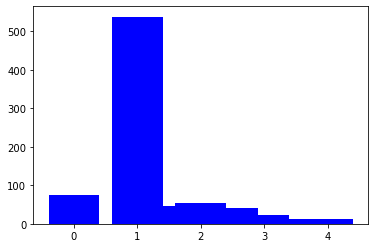

In [48]:
import matplotlib.pyplot as plt
ax = (list(hist1.keys()))
ax.sort()
print(ax)
plt.bar(list(hist1.keys()), hist1.values(), color = 'b')
plt.show()

[0.0, 1.0, 1.3, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


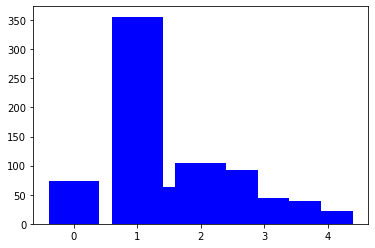

In [49]:
import matplotlib.pyplot as plt
ax = (list(hist2.keys()))
ax.sort()

print(ax)
plt.bar(list(hist2.keys()), hist2.values(), color = 'b')
plt.show()

In [53]:
import glob
from PIL import Image

files = glob.glob("*jpg_l.npy")

print(len(files))
print(files[0])

70
A23CBEF_JIN_Z_200731_204632.jpg_l.npy


In [54]:
I = []
for i in range(0, len(files)):
    mx = files[i]
    a1 = np.load(mx, allow_pickle=True)
    I.append(a1)

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy import misc,ndimage
import time

d1 = []

for i1 in range(1, 13):
    img0 = cv2.imread('%d.jpg' %(i1),)

    flag = 0

    countx = 0
    county = 0

    for i in range(0, 2):
        if (i==0):
            white_mask1 = Laplacian_with_mask(img0, -10)
            a2 = Window_approach(white_mask1)
            count31, count32, a2b, a22b, a23b = Comparison(a2)
            if(count31 == 2 and count32 == 3):
                countx = count31
                county = count32
                flag = 1
                break
        else:
            white_mask0 = Laplacian_with_mask(img0, -11)
            a2a = Window_approach(white_mask0)
            count31a, count32a, a21a, a21b, a21c = Comparison(a2a)
            if(count31a == 2 and count32a == 3):
                countx = count31a
                county = count32a
                flag = 2
                break

    if (flag == 0): 
        if (count31>=count31a and count32>=count32a):
          if (count31 == 0 or count32 == 0):      
            a21 = cv2.bitwise_or(a22b, a23b)
          else:
            a21 = cv2.bitwise_and(a22b, a23b)
          countx = count31
          county = count32
          print("1")
        elif (count31 < count31a and count32 >= count32a):
          if (count31a == 0 or count32 == 0):
            a21 = cv2.bitwise_or(a21b, a23b)
          else:
            a21 = cv2.bitwise_and(a21b, a23b)
          countx = count31a
          county = count32
          print("2")
        elif (count31>=count31a and count32 < count32a):
          if (count31 == 0 or count32a == 0):
            a21 = cv2.bitwise_or(a22b, a21c)
          else:
            a21 = cv2.bitwise_and(a22b, a21c)
          print("3")
          countx = count31
          county = count32a
        else:
            a21 = cv2.bitwise_and(a21b, a21c)
            print("4")
            countx = count31a
            county = count32a
    elif (flag == 1):
        a21 = a2b
    else: 
        a21 = a21a

    yz1 = windowx(a21, d1)
    print(i1)
    print()
    



t2 = time.time()
print("Time is :", (t2 - t1))


Good one
2
Good One
3
Dj1
Time is:  11.216255187988281
1

Good one
2
Good One
3
Dj1
Time is:  12.314016103744507
2

Good one
2
Good One
3
Dj1
Time is:  11.864987134933472
3

Good one
2
Good One
3
Dj1
Time is:  10.410982370376587
4

Good one
2
Good One
3
Dj1
Time is:  12.489988327026367
5

1
2
Good one
2
Good One
3
Dj1
Time is:  15.610223054885864
6

Good one
2
0
Dj2
Good one
2
Good One
3
Dj1
Time is:  14.999778747558594
7

Good one
2
Good One
3
Dj1
Time is:  13.29800009727478
8

Good one
2
Good One
3
Dj1
Time is:  11.79570198059082
9

Good one
2
Good One
3
Dj1
Time is:  13.137327432632446
10

Good one
2
Good One
3
Dj1
Time is:  14.722609043121338
11

Good one
2
Good One
3
Dj1
Time is:  11.533431053161621
12

Time is : 745.4582784175873


In [33]:
x2 = np.save('A3A62CE_JIN_A_200811_051132.npy', d1)